# Problem Statement
* Detecting Email is Fake,Spam,Frauds or not

## Solution:-
* Building a Machine-learning Model to Identify a spam email and make them distant from our approach. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics as m
import warnings
warnings.filterwarnings('ignore')

In [2]:
docs= pd.read_csv(r'SMSSpamCollection.csv')
docs.sample(5)

,Class,sms
4147,ham,I cant wait for cornwall. Hope tonight isnt ...
4766,ham,if you text on your way to cup stop that shoul...
3497,ham,Happy birthday... May u find ur prince charmin...
2185,ham,I know a few people I can hit up and fuck to t...
1210,ham,His bday real is in april .


In [3]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
docs.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
docs['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [6]:
docs['Class'].value_counts()/len(docs) *100

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

In [7]:

docs['label']=docs['Class'].replace({'ham':0,'spam':1})
docs

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
X=docs[['sms']]
y= docs[['label']]
X.sample(5),y.sample(5)

(                                                    sms
 4068  You are being contacted by our Dating Service ...
 941   No we sell it all so we'll have tons if coins....
 2607  R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
 4896  Want the latest Video handset? 750 anytime any...
 3192  UR awarded a City Break and could WIN a £200 S...,
       label
 679       0
 5267      0
 4316      0
 14        0
 3573      0)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X,y,random_state=1,test_size=0.25)

## Vectorization of Words`

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vect= CountVectorizer(stop_words='english')

vect.fit(xtrain['sms'])

CountVectorizer(stop_words='english')

In [11]:
b= vect.get_feature_names()
b

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [12]:
xtrain_tr= vect.transform(xtrain['sms']).toarray()
xtrain_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
xtest_tr = vect.transform(xtest['sms']).toarray()
xtest_tr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
xtrain_df = pd.DataFrame(data=xtrain_tr,columns=b)
xtest_df = pd.DataFrame(data=xtest_tr, columns=b)
xtrain_df

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
xtest_df

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

In [16]:
from sklearn.naive_bayes import BernoulliNB
bnv =BernoulliNB()

bnv.fit(xtrain_df,ytrain)

y_pred= bnv.predict(xtest_df) 
y_pred_proba = bnv.predict_proba(xtest_df)

print(m.classification_report(ytest,y_pred))
print('\n----------\n')
print('Accuracy SCore',m.accuracy_score(ytest,y_pred))
print('specificity',m.recall_score(ytest,y_pred))
print('precision',m.precision_score(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393


----------

Accuracy SCore 0.9770279971284996
specificity 0.8324324324324325
precision 0.9935483870967742


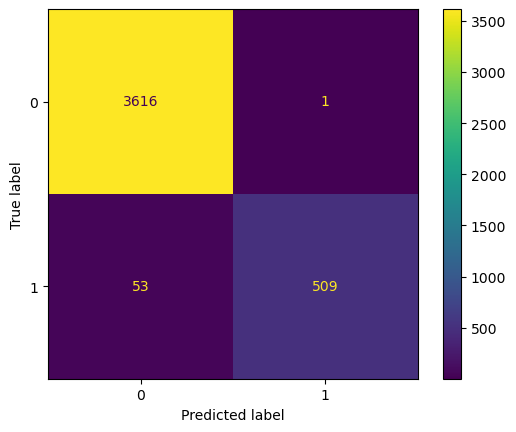

In [17]:
print(m.plot_confusion_matrix(bnv,xtrain_df,ytrain))

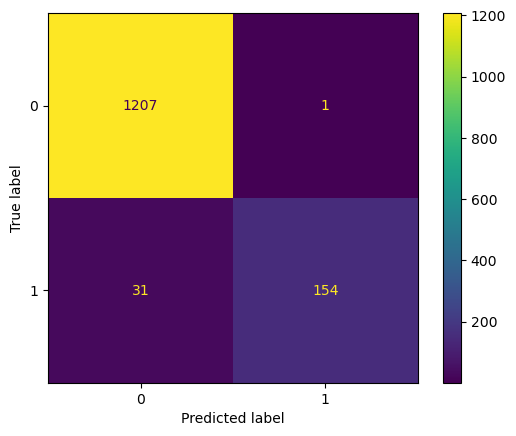

In [18]:
print(m.plot_confusion_matrix(bnv,xtest_df,ytest))

In [19]:
print(m.confusion_matrix(ytest,y_pred))

[[1207    1]
 [  31  154]]


0.915802308931448


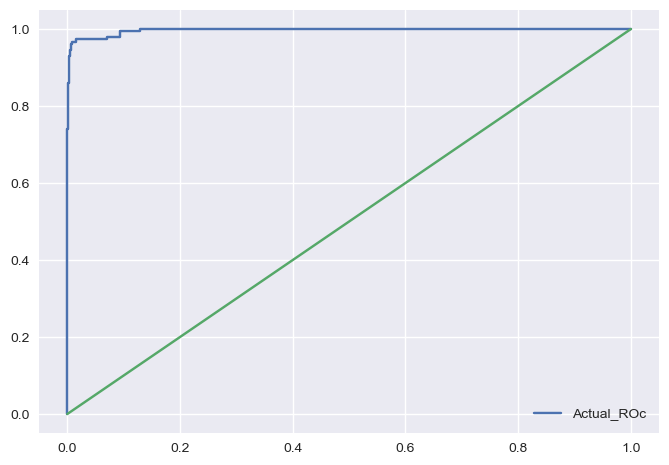

In [20]:
fpr, tpr, thres = m.roc_curve(ytest,y_pred_proba[:,1])
score = m.roc_auc_score(ytest,y_pred)
print(score)
a= [0 for i in range(len(ytest))]
dtpr,dfpr,_ = m.roc_curve(ytest,a,pos_label=1)
plt.style.use('seaborn')
plt.plot(fpr,tpr,label='Actual_ROc')
plt.plot(dtpr,dfpr)
plt.legend()
plt.show()

## Multinomial naive Bayes 

In [21]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
mnv= MultinomialNB()


In [22]:
mnv.fit(xtrain_df,ytrain)
y_pred_mn = mnv.predict(xtest_df)
y_pred_proba_mn = mnv.predict_proba(xtest_df)

In [23]:
print(m.classification_report(ytest,y_pred_mn))
print('\n----------\n')
print('Accuracy SCore',m.accuracy_score(ytest,y_pred_mn))
print('specificity',m.recall_score(ytest,y_pred_mn))
print('precision',m.precision_score(ytest,y_pred_mn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393


----------

Accuracy SCore 0.9877961234745154
specificity 0.9459459459459459
precision 0.9615384615384616


0.9700756219795956


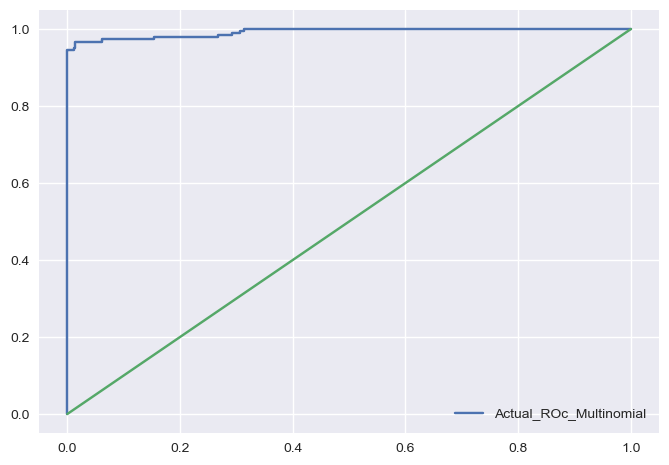

In [24]:
fpr1, tpr1, thres1 = m.roc_curve(ytest,y_pred_proba_mn[:,1])
score = m.roc_auc_score(ytest,y_pred_mn)
print(score)
a= [0 for i in range(len(ytest))]
dtpr,dfpr,_ = m.roc_curve(ytest,a,pos_label=1)
plt.style.use('seaborn')
plt.plot(fpr1,tpr1,label='Actual_ROc_Multinomial')
plt.plot(dtpr,dfpr)
plt.legend()
plt.show()

## GaussianNaive Bayes 

In [25]:
gnv = GaussianNB()
gnv.fit(xtrain_df,ytrain)
y_pred_gb = bnv.predict(xtest_df)
y_pred_proba_gb = bnv.predict_proba(xtest_df)

## Evaluating
print(m.classification_report(ytest,y_pred_gb))
print('\n----------\n')
print('Accuracy SCore',m.accuracy_score(ytest,y_pred_gb))
print('specificity',m.recall_score(ytest,y_pred_gb))
print('precision',m.precision_score(ytest,y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393


----------

Accuracy SCore 0.9770279971284996
specificity 0.8324324324324325
precision 0.9935483870967742


0.915802308931448


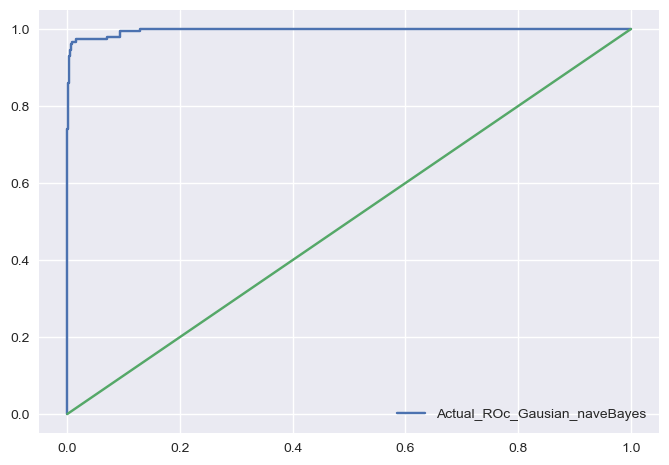

In [26]:
fpr2, tpr2, thres2 = m.roc_curve(ytest,y_pred_proba_gb[:,1])
score = m.roc_auc_score(ytest,y_pred_gb)
print(score)
a= [0 for i in range(len(ytest))]
dtpr,dfpr,_ = m.roc_curve(ytest,a,pos_label=1)
plt.style.use('seaborn')
plt.plot(fpr2,tpr2,label='Actual_ROc_Gausian_naveBayes')
plt.plot(dtpr,dfpr)
plt.legend()
plt.show()

## Best Model was Made by MultiNomial naive bayes with Accuracy of 98.78% and auc score of 97%

In [27]:
final_model =MultinomialNB()
final_model.fit(xtrain_df,ytrain)
y_pred_mn = final_model.predict(xtest_df)
y_pred_proba_mn =final_model.predict_proba(xtest_df)


In [28]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model,xtrain_df,ytrain,cv=5,scoring='accuracy')
scores_test = cross_val_score(final_model,xtest_df,ytest,cv=5,scoring='accuracy')
print('Train Scores',scores,'mean_train_score',scores.mean())
print('Test Scores',scores_test,'mean_test_score',scores_test.mean())

Train Scores [0.96889952 0.97368421 0.97607656 0.98086124 0.97005988] mean_train_score 0.9739162822679999
Test Scores [0.97849462 0.98566308 0.97849462 0.98920863 0.97841727] mean_test_score 0.982055645805936


In [30]:
print(m.classification_report(ytest,y_pred_mn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [31]:
import pickle 
pickle.dump(final_model,open('Spam_Detection.pkl','wb'))